## KNN

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [57]:
x1 = [1, 1, 2, 1.5]
y1 = [5, 4.5, 3.75, 4]

x2 = [3, 2.5, 3.5, 3.5]
y2 = [4, 3.4,3.5, 2.5]

x3 = [1, 1.5, 2, 2]
y3 = [2.5, 2.75, 3, 3.2]

<Figure size 432x288 with 0 Axes>

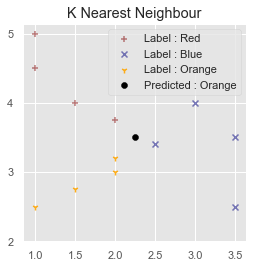

In [58]:
plt.clf()
plt.style.use('ggplot')
plt.figure(figsize = (4,4))
plt.scatter(x1, y1, color = 'maroon', alpha = 0.5, label = 'Label : Red', marker = '+')
plt.scatter(x2, y2, color = 'navy', alpha = 0.5, label = 'Label : Blue', marker = 'x')
plt.scatter(x3, y3, color = 'orange', alpha = 0.9, label = 'Label : Orange', marker = '1')
plt.scatter(2.25,3.5, color = 'black', marker = 'o', label = 'Predicted : Orange')
plt.legend()
plt.title('K Nearest Neighbour')
plt.yticks(np.arange(2, 6, 1))
plt.show()

### Implementation

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# for simplicity sake we're going to use the simple iris dataset
data = load_iris()

# getting the features and labels
X = data.data
y = data.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# scaling features for uniform evaluations
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# training model
clf = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
clf.fit(X_train, y_train)

# generating predictions on the test set
y_pred = clf.predict(X_test)

# calculating accuracy with confusion matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      0.87      0.90        15
           2       0.90      0.95      0.93        20

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [5]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': range(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(clf, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

# best K
best_K = knn_gscv.best_params_['n_neighbors']

In [7]:
best_K

6